### Authorization Key : 33f63ed15365921c3c1b6f01ed0fd123

# # Note - Consider only Indian restaurants in this analysis

### Firstly we will read the zomato.csv file using the pandas and save the Dataframe in df. Now we will extract the Indian Restaurants data using the country code equals to 1 and save the dataframe in df_India. Now we will extract the Delhi_NCR Region and Rest of India and store the dataframe in df_Delhi_NCR and df_ROI respectively


In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import operator
import numpy as np

In [2]:
df = pd.read_csv("Datasets/zomato.csv",encoding="cp437")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
df_India = df[df["Country Code"]==1]
df_India.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
df_Delhi_NCR = df_India[(df_India["City"]=="New Delhi")|(df_India["City"]=="Ghaziabad")|(df_India["City"]=="Noida")|(df_India["City"]=="Gurgaon")|(df_India["City"]=="Faridabad")]
df_Delhi_NCR.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16


In [8]:
df_ROI = df_India[(df_India["City"]!="New Delhi")&(df_India["City"]!="Ghaziabad")&(df_India["City"]!="Noida")&(df_India["City"]!="Gurgaon")&(df_India["City"]!="Faridabad")]
df_ROI.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


# 1 The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### 1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

### Explaination and Answer :- In this firstly we will find the length of df_Delhi_NCR and df_ROI which will give number of restaurants present in Delhi NCR and Rest of India and now we will plot a bar graph of this data using the matplotlib. Number of restaurants present in Delhi NCR and Rest of India are:-
•	Delhi-NCR 7947
•	Rest of India 705


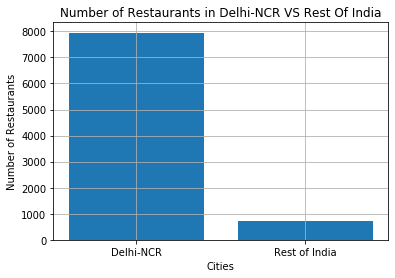

Delhi-NCR 7947
Rest of India 705


In [9]:
Delhi_NCR = len(df_Delhi_NCR)
ROI = len(df_ROI)
li = [Delhi_NCR,ROI]
label = ["Delhi-NCR","Rest of India"]
plt.bar(label,li)
plt.title("Number of Restaurants in Delhi-NCR VS Rest Of India")
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.grid()
plt.show()
for i in range(2):
    print(label[i],li[i])

### 2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

### Explaination and Answer:- In this we will extract the values of cuisines in the form of list from the df_Delhi_NCR and df_ROI respectively and apply a function named cuisines which will return the list of cuisines in that region. After that we will run a for loop and check the cuisines that are not served in Delhi-NCR. The cuisines which are not present in restaurant of Delhi NCR but present in rest of India are:-
•	German
•	Malwani
•	BBQ
•	Cajun
### Now we will use the zomato-api to check whether these cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset. Firstly we will generate a zomato api key from the website and use it as a user-key in headers. Now we will find the city id for Delhi-NCR region by making a get request to  https://developers.zomato.com/api/v2.1/cities and passing headers and params. After obtaining the city id we will make a get request to https://developers.zomato.com/api/v2.1/cuisines by passing the headers as user-key and params as city id which will give all the cuisines served in the Delhi-NCR region. So the cuisines which are not present in restaurant of Delhi NCR but present in rest of India are:-
•	German
•	Cajun


In [10]:
def cuisines(li):
    li1 = []
    for row in li:
        cuisines = row.strip().split(",")
        for cuisine in cuisines:
            cuisine = cuisine.strip()
            if cuisine not in li1:
                li1.append(cuisine)
    return li1

cuisines_in_DNCR = cuisines(df_Delhi_NCR["Cuisines"].values)
cuisines_in_ROI = cuisines(df_ROI["Cuisines"].values)

In [11]:
cuisines_not_in_DNCR = []
for cuisines in cuisines_in_ROI:
    if cuisines not in cuisines_in_DNCR:
        cuisines_not_in_DNCR.append(cuisines)

In [12]:
print("Cuisines which are not present in restaurant of Delhi NCR but present in Rest of India are",*cuisines_not_in_DNCR)

Cuisines which are not present in restaurant of Delhi NCR but present in Rest of India are German Malwani BBQ Cajun


In [13]:
h={"user-key":"33f63ed15365921c3c1b6f01ed0fd123"}
p = {"q":"Delhi NCR"}
response=requests.get("https://developers.zomato.com/api/v2.1/cities",headers=h,params=p)
data = response.json()
city_id = 0
for row in data["location_suggestions"]:
    if row["name"]=="Delhi NCR":
        city_id = row["id"]
        break

response_2 = requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers = h,params = {"city_id":city_id})
cuisines_data = response_2.json()["cuisines"]
all_cuisines_in_DNCR=[]
for row in cuisines_data:
    all_cuisines_in_DNCR.append(row["cuisine"]["cuisine_name"])

In [14]:
discrepancy_in_cuisines=[]
for cuisine in cuisines_not_in_DNCR:
    if cuisine in all_cuisines_in_DNCR:
        discrepancy_in_cuisines.append(cuisine)

In [15]:
print("Cuisines that are served in Delhi-NCR are ",*discrepancy_in_cuisines,"But due to incomplete dataset they were not served in Delhi-NCR")

Cuisines that are served in Delhi-NCR are  Malwani BBQ But due to incomplete dataset they were not served in Delhi-NCR


### 3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

### Explaination and Answer:- In order to find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India we will firstly extract the cuisines from df_India and run through a function cuisines which will return a dictionary with cuisine and count as a key-value pair. Now we will a sort the dictionary in reverse order on the basis of count and make it into the list and extract the top 10 from the list. So the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India are:-
•	f-India
•	North Indian
•	Chinese
•	Fast Food
•	Mughlai
•	Bakery
•	Continental
•	Italian
•	South Indian
•	Cafe
•	Desserts



In [16]:
def cuisines(li):
    d={}
    for row in li:
        cuisines = row.strip().split(",")
        for cuisine in cuisines:
            cuisine = cuisine.strip()
            d[cuisine] = d.get(cuisine,0) + 1
    return d

cuisines_serve_by_max_restaurant_in_DNCR1 = cuisines(df_Delhi_NCR["Cuisines"].values)
cuisines_serve_by_max_restaurant_in_ROI1 = cuisines(df_ROI["Cuisines"].values)
cuisines_serve_by_max_restaurant_in_DNCR1andROI1 = cuisines(df_India["Cuisines"].values)

In [17]:
cuisines_serve_by_max_restaurant_in_DNCRandROI = sorted(cuisines_serve_by_max_restaurant_in_DNCR1andROI1.items(),key=operator.itemgetter(1),reverse=True)
print("Top 10 cuisines served by maximum number of restaurants in Delhi-NCR and Rest-Of-India")
for row in cuisines_serve_by_max_restaurant_in_DNCRandROI[:10]:
    print(row[0])

Top 10 cuisines served by maximum number of restaurants in Delhi-NCR and Rest-Of-India
North Indian
Chinese
Fast Food
Mughlai
Bakery
Continental
Italian
South Indian
Cafe
Desserts


In [18]:
cuisines_serve_by_max_restaurant_in_DNCR= sorted(cuisines_serve_by_max_restaurant_in_DNCR1.items(),key=operator.itemgetter(1),reverse=True)
print("Top 10 cuisines served by maximum number of restaurants in Delhi-NCR")
for row in cuisines_serve_by_max_restaurant_in_DNCR[:10]:
    print(row[0])

Top 10 cuisines served by maximum number of restaurants in Delhi-NCR
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian


In [19]:
cuisines_serve_by_max_restaurant_in_ROI= sorted(cuisines_serve_by_max_restaurant_in_ROI1.items(),key=operator.itemgetter(1),reverse=True)
print("Top 10 cuisines served by maximum number of restaurants in Rest-of-India")
for row in cuisines_serve_by_max_restaurant_in_ROI[:10]:
    print(row[0])

Top 10 cuisines served by maximum number of restaurants in Rest-of-India
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


### 4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference

### Explaination and Answer:- In this we will compare the two regions on the basis of cuisines and number of restaurants serving the cuisines. As done previously we will extract the top 10 cuisines in Delhi-NCR and ROI separately and plot the two line graphs accordingly

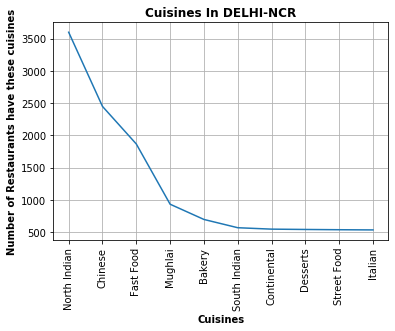

In [20]:
li_DNCR_cuisines = []
li_DNCR_count_cuisines = []
for row in cuisines_serve_by_max_restaurant_in_DNCR[:10]:
    li_DNCR_cuisines.append(row[0])
    li_DNCR_count_cuisines.append(row[1])
plt.plot(li_DNCR_cuisines,li_DNCR_count_cuisines)
plt.xlabel("Cuisines",fontweight="bold")
plt.ylabel("Number of Restaurants have these cuisines",fontweight="bold")
plt.title("Cuisines In DELHI-NCR",fontweight="bold")
plt.grid()
plt.xticks(rotation=90)
plt.show()


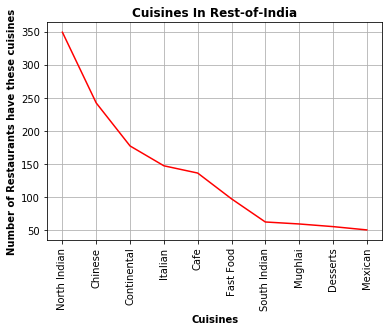

In [21]:
li_ROI_cuisines = []
li_ROI_count_cuisines = []
for row in cuisines_serve_by_max_restaurant_in_ROI[:10]:
    li_ROI_cuisines.append(row[0])
    li_ROI_count_cuisines.append(row[1])
plt.plot(li_ROI_cuisines,li_ROI_count_cuisines,c="r")
plt.xlabel("Cuisines",fontweight="bold")
plt.ylabel("Number of Restaurants have these cuisines",fontweight="bold")
plt.title("Cuisines In Rest-of-India",fontweight="bold")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [22]:
print(len(cuisines_in_DNCR))
print(len(cuisines_in_ROI))

86
70


### From the above two graphs we can see that in Delhi-NCR region there are more than 3500 restaurants selling North Indian cuisine while there are only 350 restaurants which sell North Indian cuisine in the Rest of India which is a lot of difference. Moving on to Chinese cuisine there are about 2500 restaurants selling Chinese cuisine in Delhi-NCR while there are about 250 restaurants which sell Chinese cuisine in the Rest of India. Moreover there are 86 cuisines that are sold in Delhi-NCR region while there are 70 cuisines sold in Rest of India.This makes a huge difference as Delhi-NCR region restaurants sell more cuisines than that of Rest of India

# 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### Firstly we will make a copy of the df_India and store it in df_2.

In [23]:
df_2 = df_India.copy()
df_2.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


## 1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

### Number of Votes given Restaurant

### Explaination and Answer :- We will now group the df_2 by Aggregate rating and find the mean of votes and sort them according to index in ascending order. We will extract the rating from the index and the votes from the values and plot a line graph between the rating and the votes.


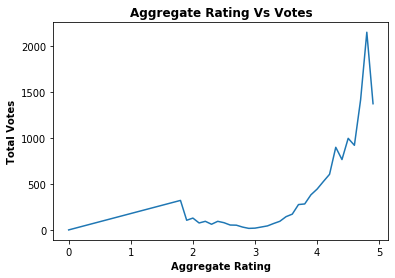

In [24]:
rating_and_votes = df_2.groupby("Aggregate rating")["Votes"].mean().sort_index(ascending=True)
rating = rating_and_votes.index
votes = rating_and_votes.values
plt.plot(rating,votes)
plt.xlabel("Aggregate Rating",fontweight="bold")
plt.ylabel("Total Votes",fontweight="bold")
plt.title("Aggregate Rating Vs Votes",fontweight="bold")
plt.show()

### Answer :-  From the given graph we can see that number of votes have huge impact on the ratings.So with increase in number of votes it results in increase of rating

### 2. Restaurant serving more number of cuisines.

### Explaination and Answer:- In this we will make a new column in df_2 named Cuisines_count with the help of count_cuisines function which returns the count of the cuisines a restaurant  serves. Now We will group the df_2 by Aggregate rating and find the mean of Cuisines_count and sort them according to index in ascending order. We will extract the rating from the index and the Cuisines_count from the values and plot a line graph between the rating and the votes.

In [25]:
def count_cuisines(s):
    if type(s)==float:
        return 0
    cuisines = s.split(",")
    return len(cuisines)

df_2["Cuisines_count"] = df_2["Cuisines"].apply(count_cuisines)
df_2.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_count
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,1


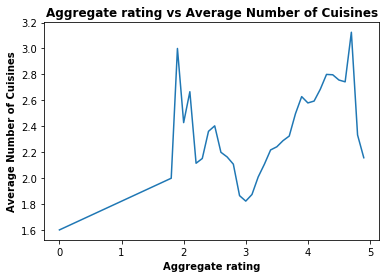

In [26]:
a1=df_2.groupby("Aggregate rating")["Cuisines_count"].mean().sort_index()
plt.plot(a1.index,a1.values)
plt.xlabel("Aggregate rating",fontweight="bold")
plt.ylabel("Average Number of Cuisines",fontweight="bold")
plt.title("Aggregate rating vs Average Number of Cuisines",fontweight="bold")
plt.show()

### From the graph we can see that more the cuisines more is the rating but for some restaurants this is not applied

### Average Cost of Restaurant

### Explaination and Answer:- We will now group the df_2 by Aggregate rating and find the mean of Average Cost for two and sort them according to index in ascending order. We will extract the rating from the index and the Average Cost for two from the values and plot a line graph between the rating and the votes.

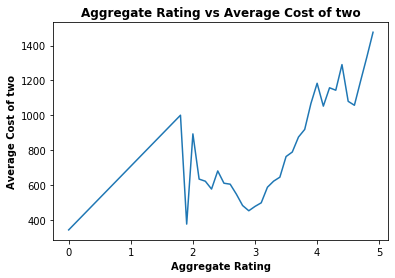

In [27]:
final_currency = df_2.groupby("Aggregate rating")["Average Cost for two"].mean().sort_index()
rating = final_currency.index
average_cost = final_currency.values
plt.plot(rating,average_cost)
plt.xlabel("Aggregate Rating",fontweight="bold")
plt.ylabel("Average Cost of two",fontweight="bold")
plt.title("Aggregate Rating vs Average Cost of two",fontweight="bold")
plt.show()

### Answer:- From the graph we can conclude that higher the average cost of restaurant higher is the rating but not applied to the 0 to 2 ratings.

### 4. Restaurant serving some specific cuisines.

### Explaination and Answer:- In this we will firstly extract the unique values of Rating text using value_counts and then whose rating text is Excellent and Very Good we will extract that cuisines and make a dictionary of these cuisines and their count. Then we will sort the dictionary in the reverse order on the basis of count and make the list of special cuisines. Then using specialcuisines function we will make a new column which stores the special cuisine of that restaurant. Then we will group the df_2 by Special_Cuisine and find the median of Aggregate rating and sort them according to values in descending order. We will extract the rating from the values and the cuisines from the index and plot a bar graph between the cuisines and the rating.

In [28]:
print(df_2["Rating text"].value_counts())

Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: Rating text, dtype: int64


In [29]:
dict_cuisines = {}
dict_rating = {}
dict_count = {}
array_of_rating_text = df_2[["Cuisines","Aggregate rating","Rating text"]].values
for row in range(len(array_of_rating_text)):
    food = array_of_rating_text[row][0].strip().split(",")
    for foo in food:
        foo=foo.strip()
    if array_of_rating_text[row][2]=="Excellent" or array_of_rating_text[row][2]=="Very Good":
        for foo in food:
            foo=foo.strip()
            dict_cuisines[foo] = dict_cuisines.get(foo,0)+1
special = np.array(sorted(dict_cuisines.items(),key=operator.itemgetter(1),reverse=True)[:14])
special_cuisine = special[:,0]
print(special_cuisine)

['North Indian' 'Continental' 'Italian' 'Chinese' 'Cafe' 'Fast Food'
 'Asian' 'Desserts' 'Mughlai' 'American' 'European' 'Mexican' 'Bakery'
 'Thai']


In [30]:
df_2.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_count
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,2


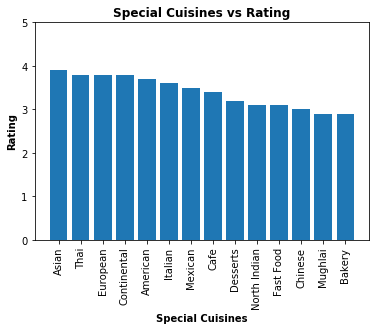

In [31]:
def specialcuisines(s):
    s = s.strip().split(",")
    li=[]
    for foo in s:
        li.append(foo.strip())
    for cuis in special_cuisine:
        if cuis in li:
            return cuis
df_2["Special_Cuisine"] = df_2["Cuisines"].apply(specialcuisines)
data_special_cuisines = df_2.groupby("Special_Cuisine")["Aggregate rating"].median().sort_values(ascending=False)
cuisines = data_special_cuisines.index
rating = data_special_cuisines.values
plt.bar(cuisines,rating)
plt.xlabel("Special Cuisines",fontweight="bold")
plt.ylabel("Rating",fontweight="bold")
plt.title("Special Cuisines vs Rating",fontweight="bold")
plt.xticks(rotation=90)
plt.ylim(ymax = 5, ymin = 0)
plt.show()

### Answer:- Restaurants serving some special cuisines like asian,continental,italian have more ratings than the other restaurants

## 2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### 1. Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

### Explaination and Answer:- In this we will make a new column of Weighted Restaurant Rating which will be number of votes * rating. Then we will group df_2 by Locality and find the sum of Weighted Restaurant Rating and store it in a1. After that we will group df_2 by locality and find the sum of Votes and store it in a2. Then we will divide a1 by a2 and sort them on the basis of values in descending order and extract the top 10 localities and then with the help of this data we will plot the bar graph of locality vs Weighted Restaurant Rating.
The top 10 localities with more weighted restaurant rating are:-
•	Aminabad 					4.9
•	Hotel Clarks Amer, Malviya Nagar 	4.9
•	Friends Colony 				4.886916367367881
•	Powai 						4.841868613138686
•	Kirlampudi Layout 				4.820161290322581
•	Express Avenue Mall,  Royapettah 	4.8
•	Deccan Gymkhana 				4.8
•	Banjara Hills 					4.718761726078799
•	Sector 5, Salt Lake 				4.707022552098202
•	Riverside Mall, Gomti Nagar 		4.7


Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7


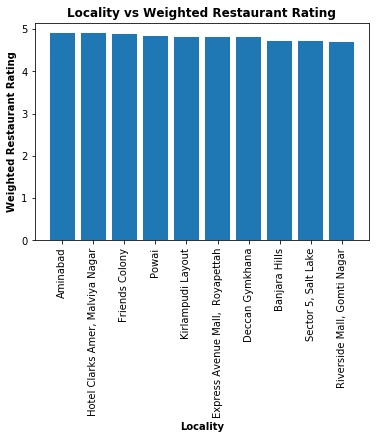

In [32]:
df_2["Weighted Restaurant Rating"] = df_2["Votes"]*df_2["Aggregate rating"]
a1=df_2.groupby("Locality")["Weighted Restaurant Rating"].sum()
a2=df_2.groupby("Locality")["Votes"].sum()
weighted_restaurant_rating = a1/a2
final_ans = weighted_restaurant_rating.sort_values(ascending=False)[:10]
for i in range(10):
    print(final_ans.index[i],final_ans.values[i])
plt.bar(final_ans.index,final_ans.values)
plt.xlabel("Locality",fontweight="bold")
plt.ylabel("Weighted Restaurant Rating",fontweight="bold")
plt.title("Locality vs Weighted Restaurant Rating",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

# 3. Visualization

## 1. Plot the bar graph top 15 restaurants have a maximum number of outlets.

### Explaination and Answer:-In this we will group df_3 by Restaurant Name and find the value_counts() and sort it according to descending order and extract top 15. We will extract the restaurants from the index and the count of outlets from the values. So with this data we will plot the bar graph of Restaurants vs Number of Outlets. Top 15 restaurants have a maximum number of outlets are:-
•	Cafe Coffee Day 		83
•	Domino's Pizza 		79
•	Subway 			63
•	Green Chick Chop	51
•	McDonald's 		48
•	Keventers 			34
•	Pizza Hut 			29
•	Giani 				29
•	Baskin Robbins 		28
•	Barbeque Nation 		25
•	Dunkin' Donuts 		22
•	Giani's 			22
•	Barista 			22
•	Pind Balluchi 		20
•	Costa Coffee 		20


In [33]:
df_3 = df_India.copy()
df_3.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Giani 29
Pizza Hut 29
Baskin Robbins 28
Barbeque Nation 25
Barista 22
Giani's 22
Dunkin' Donuts 22
Costa Coffee 20
Pind Balluchi 20


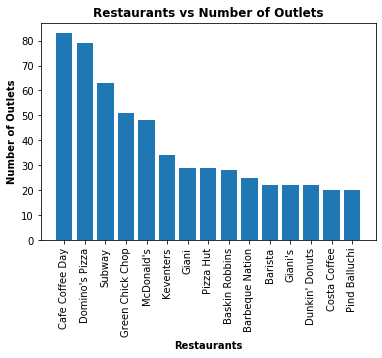

In [34]:
restaurant_with_max_outlets = df_3["Restaurant Name"].value_counts().sort_values(ascending=False)[:15]
restaurants = restaurant_with_max_outlets.index
count_of_outlets = restaurant_with_max_outlets.values
for i in range(15):
    print(restaurants[i],count_of_outlets[i])
plt.bar(restaurants,count_of_outlets)
plt.xlabel("Restaurants",fontweight="bold")
plt.ylabel("Number of Outlets",fontweight="bold")
plt.title("Restaurants vs Number of Outlets",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## 2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

### Explaination and Answer:- In this we will make a df_hist in which Rating text is not equal to Not rated. After that we will store the values of Aggregate rating in the data and make the historgram with this data keeping the bins as auto

In [35]:
df_3["Rating text"].value_counts()

Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: Rating text, dtype: int64

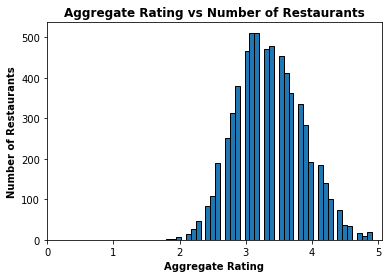

In [36]:
df_hist = df_3[df_3["Rating text"]!="Not rated"]
data = df_hist["Aggregate rating"]
plt.hist(data,bins="auto",edgecolor="black")
plt.xlabel("Aggregate Rating",fontweight="bold")
plt.ylabel("Number of Restaurants",fontweight="bold")
plt.title("Aggregate Rating vs Number of Restaurants",fontweight="bold")
plt.xticks([0,1,2,3,4,5])
plt.show()

## 3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.

### Explaination and Answer:- In this we will group df_3 by Restaurant Name and find the sum of the votes and sort by the values in descending order and extract the top 10 restaurants. We will extract the restaurants by the index and the votes by the values. Now we will Make a bar graph with the help of this data. Top 10 restaurants in the data with the highest number of votes are :-
•	Barbeque Nation 			27835
•	AB's - Absolute Barbecues 	13400
•	Toit 					10934
•	Big Chill 					10853
•	Truffles 					9682
•	Farzi Cafe 				9189
•	Chili's 					8156
•	Hauz Khas Social 			7931
•	Joey's Pizza 				7807
•	Peter Cat 				7574


Barbeque Nation 27835
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Truffles 9682
Farzi Cafe 9189
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


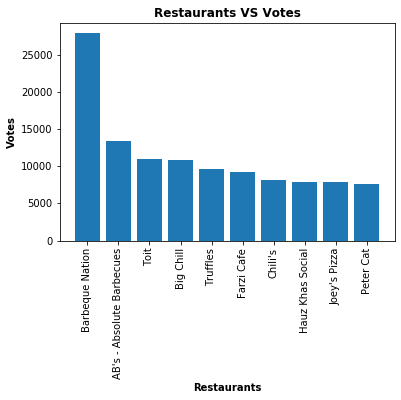

In [37]:
data_restaurants = df_3.groupby("Restaurant Name")["Votes"].sum().sort_values(ascending=False)[:10]
restaurants = data_restaurants.index
votes = data_restaurants.values
for i in range(10):
    print(restaurants[i],votes[i])
plt.bar(restaurants,votes)
plt.xlabel("Restaurants",fontweight="bold")
plt.ylabel("Votes",fontweight="bold")
plt.title("Restaurants VS Votes",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## 4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

### Explaination and Answer:- In this firstly we will extract the data of USA from the df by using Country Code as 216 and store it in df_USA and we will drop the na values from that. Now we will extract the cuisines values from the df_USA and with the help of cuisines function we will make a dictionary which stores the cuisines and its count. Now we will sort the dictionary on the basis of count and convert it into list and get the top 10 cuisines. Now with the help of this data we will plot a pie chart. The top 10 cuisines present in restaurants in the USA are:-
•	American 	112
•	Seafood 	59
•	Burger 		49
•	Sandwich 	49
•	Pizza 		49
•	Steak 		42
•	Italian 		38
•	Breakfast 	37
•	Mexican 	36
•	Sushi 		34


In [38]:
df_USA = df[df["Country Code"]==216]
df_USA.head(3)
df_USA.dropna(inplace=True)

C:\Users\aarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


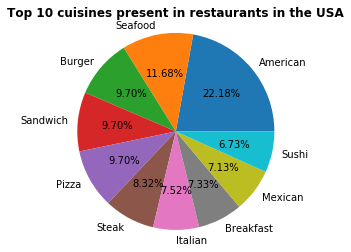

In [39]:
def cuisines(li):
    d={}
    for row in li:
        cuisines = row.strip().split(",")
        for cuisine in cuisines:
            cuisine = cuisine.strip()
            d[cuisine] = d.get(cuisine,0) + 1
    return d
usa_cuisines = df_USA["Cuisines"].values
top_cuisines = cuisines(usa_cuisines)
usa_top_10_cuisines = np.array(sorted(top_cuisines.items(),key=operator.itemgetter(1),reverse=True)[:10])
for i in range(10):
    print(usa_top_10_cuisines[i][0],usa_top_10_cuisines[i][1])
plt.pie(usa_top_10_cuisines[:,1],labels=usa_top_10_cuisines[:,0],autopct="%.2f%%")
plt.title("Top 10 cuisines present in restaurants in the USA",fontweight="bold")
plt.axis("equal")
plt.show()

## 5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### Explaination and Answer:- In this we will do exact thing which we have done in 2.2.1 but the only difference is that we will group the data by cities. Now we get the weighted_restaurant_rating. Now we will extract the rating by values and cities by index. Then we will find the number of restaurants in the city with the help of value_counts() and sort on the index in the ascending order and store it’s values in number_of_restaurants_in_city. Now we will plot a bubble graph of the cities and number_of_restaurants_in_city using s as weighted_rating*9.

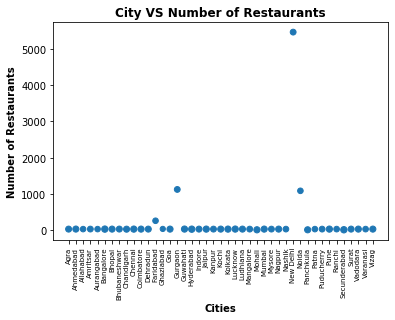

In [40]:
df_3["Weighted Restaurant Rating"] = df_3["Votes"]*df_3["Aggregate rating"]
a1=df_3.groupby("City")["Weighted Restaurant Rating"].sum()
a2=df_3.groupby("City")["Votes"].sum()
weighted_restaurant_rating = a1/a2
final_ans = weighted_restaurant_rating.sort_index()
cities = final_ans.index
weighted_rating =final_ans.values
number_of_restaurants_in_city=df_3["City"].value_counts().sort_index().values
plt.scatter(cities,number_of_restaurants_in_city,s=weighted_rating*9)
plt.xticks(rotation=90)
plt.xlabel("Cities",fontweight="bold")
plt.ylabel("Number of Restaurants",fontweight="bold")
plt.title("City VS Number of Restaurants",fontweight="bold")
plt.tick_params(axis='x', which='major', labelsize=7)
plt.show()